In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("/content/ecommerce_sales_data.csv")

df.head()

# Load data
# Check data types
# Missing values
# Duplicate rows
# Outliers
# Visualization

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [9]:
df.isnull().sum()           # no missing value

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


In [17]:
df.duplicated()
df.duplicated().sum()

# df.drop_duplicates()

np.int64(0)

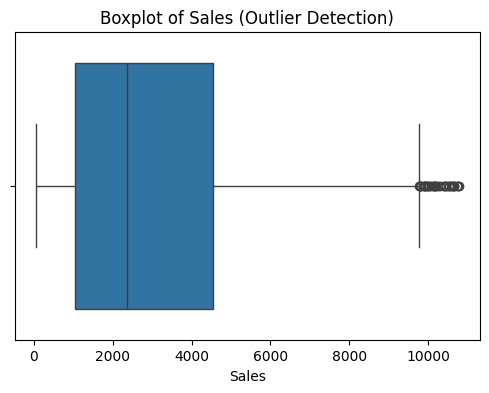

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Sales"])
plt.title("Boxplot of Sales (Outlier Detection)")
plt.show()


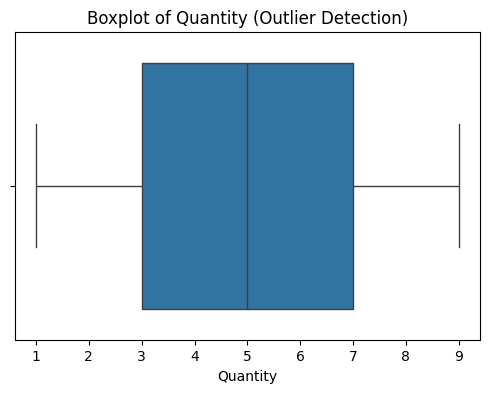

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Quantity"])
plt.title("Boxplot of Quantity (Outlier Detection)")
plt.show()


In [ ]:
Q1 = df["Sales"].quantile(0.25)          # for remove outliers
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Sales"] >= Q1 - 1.5 * IQR) &
        (df["Sales"] <= Q3 + 1.5 * IQR)]


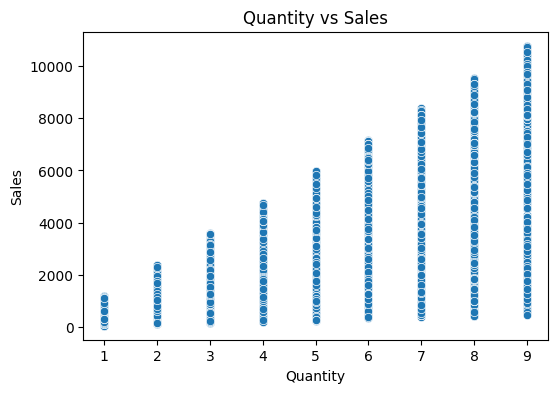

In [24]:
plt.figure(figsize=(6,4))           # visualizations
sns.scatterplot(x=df["Quantity"], y=df["Sales"])
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity vs Sales")
plt.show()


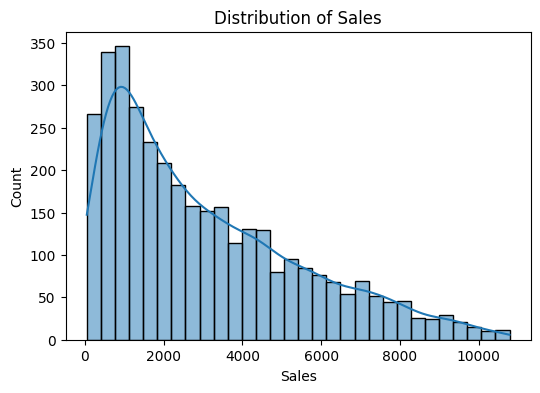

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()


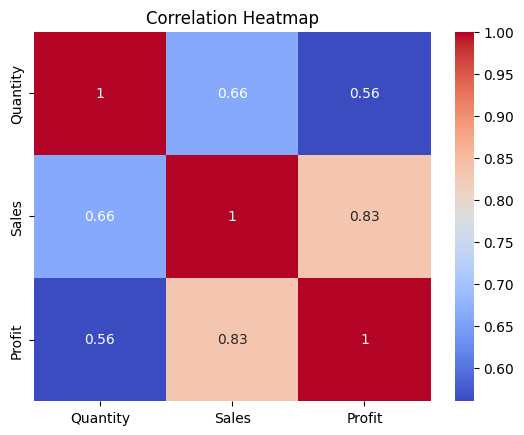

In [28]:
# plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include="number").corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [30]:
X = df[["Quantity"]]   # Independent variable
y = df["Sales"]        # Target


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
print("Intercept:", model.intercept_)
print("Slope (Coefficient):", model.coef_[0])


Intercept: -15.342432502442534
Slope (Coefficient): 617.6558743723574


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 3373973.040398608
RMSE: 1836.8377828209566
R² Score: 0.46222183636299696


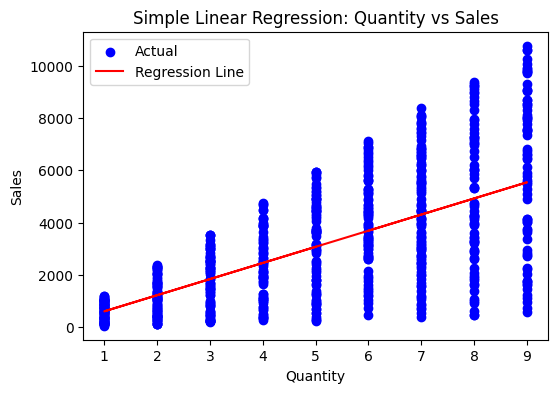

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.legend()
plt.title("Simple Linear Regression: Quantity vs Sales")
plt.show()


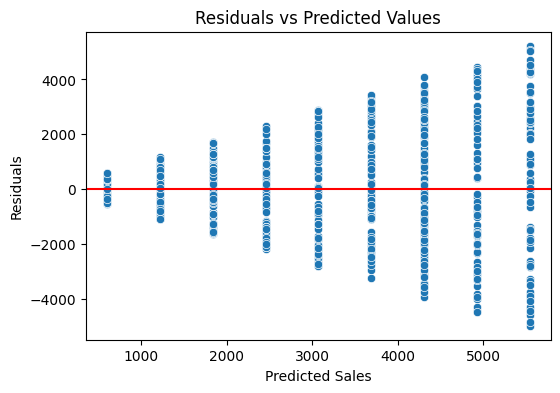

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
